In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def batch_gradient_descent(theta, x, y, alpha=0.01, n_iter=200, print_cost=1000, plot=False):
    """
    Implements batch gradient descent using vectors and numpy.
    
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        n_iter    : # iterations to run
        alpha     : learning rate
        print_cost: # iterations to print cost
        
    Returns:
        theta, n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
    
    plot_data = []
    
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
        
    for z in range(n_iter):  
        h = sigmoid(np.dot(x, theta))
        theta = theta - alpha / m * np.sum((h - y) * x, axis=0, keepdims=True).T
        cost = -1 / m * np.sum(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
        
        if z % print_cost == 0:
            plot_data.append([z, cost])
            print(cost)
    
    if plot:
        # Plot the cost function
        plot_x = [item[0] for item in plot_data]
        plot_y = [item[1] for item in plot_data]
        plt.xlabel('Iteration')
        plt.ylabel('Loss value')
        plt.plot(plot_x, plot_y, 'r--')
            
    return theta, cost

In [52]:
x, y = load_iris(return_X_y=True)

In [53]:
np.unique(y)

array([0, 1, 2])

In [54]:
indices = np.where(y < 2)
x = x[indices]
y = y[indices]

In [55]:
y = y.reshape((y.shape[0], 1))

In [56]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [13]:
theta = np.random.randn(x.shape[1], 1)

0.6872903894213849
0.687254414753275
0.6872184494293159


array([[-0.41943555],
       [-1.55104313],
       [-0.27857455],
       [ 1.68398765],
       [ 0.68687871]])

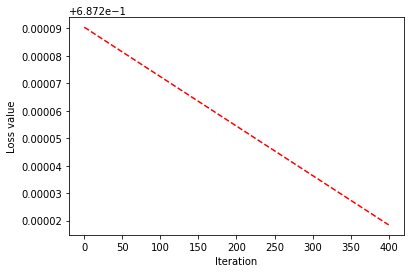

In [19]:
batch_gradient_descent(theta, x, y, n_iter=500, print_cost=200, plot=True)

In [4]:
def run_experiment(x, y, alpha=0.1, n_iter=500, print_cost=1000000):
    """
    Runs one experiment (trial), comparing the number of iterations required to converge
    using 1/LC vs. custom alpha value.
    
    Args:
    -----
    x: (m, n + 1)-dimension matrix
    y: (m, 1)-dimension vector
    """
    m = x.shape[0]
    n = x.shape[1] - 1
    theta = np.random.randn(n + 1, 1)
    
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    theta_final, cost = batch_gradient_descent(theta, x, y, alpha=alpha, n_iter=n_iter, print_cost=print_cost)
    print('Traditional cost =', cost)
    
    predictions = sigmoid(np.dot(x, theta_final))
    predictions = (predictions >= 0.5)
    accuracy = np.sum(predictions == y) / len(y)
    print('Traditional accuracy =', accuracy)

    L = 1 / (2 * m) * np.linalg.norm(x)
    a = np.abs(1 / L)
    print('Custom learning rate:', a)
    theta_final, cost = batch_gradient_descent(theta, x, y, alpha=a, n_iter=n_iter, print_cost=print_cost)
    print('Custom cost =', cost)
    
    predictions = sigmoid(np.dot(x, theta_final))
    predictions = (predictions >= 0.5)
    accuracy = np.sum(predictions == y) / len(y)
    print('Custom accuracy =', accuracy)

In [57]:
run_experiment(x, y, n_iter=1000, print_cost=200)

0.6945055270474316
0.6941325924969448
0.6937606493101364
0.6933896926804904
0.6930197178248679
Traditional cost = 0.692652562550147
Traditional accuracy = 0.5
Custom learning rate: 830.2253199119325
0.6945055270474316
0.14937339028650728
0.0811125188179951
0.05590837125996618
0.04284007871328506
Custom cost = 0.034867963817304615
Custom accuracy = 1.0


## covertype data

In [5]:
from sklearn.datasets import fetch_covtype

In [40]:
x, y = fetch_covtype(return_X_y=True)

In [41]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [42]:
indices = np.where(y < 3)
x = x[indices]
y = y[indices]

In [43]:
y.shape

(495141,)

In [44]:
y = y.reshape((y.shape[0], 1))

In [45]:
indices = np.where(y == 1)
y[indices] = 0

In [46]:
indices = np.where(y == 2)
y[indices] = 1

In [47]:
np.unique(y)

array([0, 1], dtype=int32)

In [48]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [49]:
x.shape

(495141, 55)

In [50]:
x = x[:, :10]

In [51]:
run_experiment(x, y, n_iter=1000, print_cost=100)

0.693147487561644
0.6931474875594844
0.6931474875573231
0.6931474875551613
0.6931474875530012
0.6931474875508398
0.6931474875486774
0.6931474875465158
0.693147487544356
0.6931474875421934
Traditional cost = 0.6931474875400547
Traditional accuracy = 0.43055412498662
Custom learning rate: 189355845.12800044
0.693147487561644
0.6897770952214541
0.687521636382199
0.6860054210742558
0.6849795949246131
0.6842794382266947
0.6837958721482589
0.6834565873357585
0.6832135855728259
0.6830349613586965
Custom cost = 0.6829006694702572
Custom accuracy = 0.5721622729687099


## breast cancer data

In [29]:
from sklearn.datasets import load_breast_cancer

In [37]:
x, y = load_breast_cancer(return_X_y=True)

In [38]:
y = y.reshape((y.shape[0], 1))
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [8]:
np.unique(y)

array([0, 1])

In [39]:
run_experiment(x, y, n_iter=100)

0.6927372076036958
Traditional cost = 0.692728246453714
Traditional accuracy = 0.43233743409490333
Custom learning rate: 4280.227670674592
0.6927372076036958
Custom cost = 0.46770330051948655
Custom accuracy = 0.9050966608084359


# Loss threshold experiments

In [26]:
def new_batch_gradient_descent(theta, x, y, alpha=0.01, thr=1):
    """
    Implements batch gradient descent using vectors and numpy.
    
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        alpha     : learning rate
        thr       : loss threshold
        
    Returns:
        theta, n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
    
    plot_data = []
    
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
    
    it = 0
    cost = thr
        
    while cost >= thr:
        it += 1
        h = sigmoid(np.dot(x, theta))
        theta = theta - alpha / m * np.sum((h - y) * x, axis=0, keepdims=True).T
        cost = -1 / m * np.sum(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
        
        if it % 1000 == 0:
            print('iteration', it, 'cost', cost)
            
    return theta, it

In [21]:
def run_new_experiment(x, y, alpha=0.1, thr=1):
    """
    Runs one experiment (trial), comparing the number of iterations required to converge
    using 1/LC vs. custom alpha value.
    
    Args:
    -----
    x: (m, n + 1)-dimension matrix
    y: (m, 1)-dimension vector
    """
    m = x.shape[0]
    n = x.shape[1] - 1
    theta = np.random.randn(n + 1, 1)
    
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    theta_final, it = new_batch_gradient_descent(theta, x, y, alpha=alpha, thr=thr)
    print('Traditional #it =', it)

    L = 1 / (2 * m) * np.linalg.norm(x)
    a = np.abs(1 / L)
    print('Custom learning rate:', a)
    theta_final, it = new_batch_gradient_descent(theta, x, y, alpha=a, thr=thr)
    print('Custom #it =', it)

## covertype

In [22]:
x, y = fetch_covtype(return_X_y=True)

indices = np.where(y < 3)
x = x[indices]
y = y[indices]

x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)
y = y.reshape((y.shape[0], 1))

indices = np.where(y == 1)
y[indices] = 0

indices = np.where(y == 2)
y[indices] = 1

x = x[:, :10]

In [28]:
run_new_experiment(x, y, thr=0.693147)

KeyboardInterrupt: 

## breast cancer

In [30]:
x, y = load_breast_cancer(return_X_y=True)
y = y.reshape((y.shape[0], 1))
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [31]:
run_new_experiment(x, y, thr=0.69)

iteration 1000 cost 0.6932637068967112
iteration 2000 cost 0.6931724712203551
iteration 3000 cost 0.6930812701789715
iteration 4000 cost 0.6929901037244204
iteration 5000 cost 0.6928989718087702
iteration 6000 cost 0.6928078743842978
iteration 7000 cost 0.692716811403487
iteration 8000 cost 0.6926257828190271
iteration 9000 cost 0.6925347885838127
iteration 10000 cost 0.692443828650942
iteration 11000 cost 0.6923529029737155
iteration 12000 cost 0.6922620115056357
iteration 13000 cost 0.6921711542004055
iteration 14000 cost 0.6920803310119271
iteration 15000 cost 0.6919895418943012
iteration 16000 cost 0.6918987868018259
iteration 17000 cost 0.6918080656889957
iteration 18000 cost 0.6917173785105
iteration 19000 cost 0.6916267252212227
iteration 20000 cost 0.6915361057762414
iteration 21000 cost 0.6914455201308249
iteration 22000 cost 0.6913549682404344
iteration 23000 cost 0.6912644500607202
iteration 24000 cost 0.6911739655475226
iteration 25000 cost 0.6910835146568695
iteration 2600